# Packages

In [1]:
import pandas as pd
import numpy as np
import random
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)
random.seed(42)

In [3]:
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/oliver/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/oliver/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# Reading Data

In [ ]:
# Load data from CSV file
tweets = pd.read_csv("https://raw.githubusercontent.com/kbrennig/MODS_WS25_26/refs/heads/main/data/airlinetweets.csv")

In [5]:
# Display the first document
print(tweets['text'][0])

@AmericanAir thank you for doing the best you could to get me rebooked. Agent on phone &amp; addtl resolution on DM was very much appreciated.


# Split Data into a Train and Test

In [6]:
# Create training and test sets
X = tweets.drop(columns=['sentiment_human'])
y = tweets['sentiment_human']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train

,tweet_id,airline,text,tweet_created
9254,5.698509e+17,American,@AmericanAir stiiiil waiting. Please respond a...,2015-02-23
1561,5.697709e+17,American,@AmericanAir yes we did make it home. But by n...,2015-02-23
1670,5.696369e+17,United,@united Would be nice if @staralliance partner...,2015-02-22
6087,5.693638e+17,United,@united just DM'd,2015-02-21
6669,5.699694e+17,US Airways,@USAirways owes Tammy from the Winston-Salem c...,2015-02-23
...,...,...,...,...
5734,5.684942e+17,US Airways,@USAirways I just think it's weird to have mil...,2015-02-19
5191,5.702388e+17,American,@AmericanAir Is it possible to change the FF n...,2015-02-24
5390,5.696930e+17,US Airways,@USAirways - just passed the 3 hour mark #onho...,2015-02-22
860,5.698785e+17,American,@AmericanAir at gate c11. Your gate agents are...,2015-02-23


# Fit Vectorizer on Training Set

Applying trained vectorizer on Train- and Test-set

In [8]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Define a custom preprocessor function for stemming
def custom_preprocessor(text):
    return ' '.join([stemmer.stem(word.lower()) for word in text.split()])

# Construct document-term matrix
tfidf_vect = TfidfVectorizer(min_df=0.001, preprocessor=custom_preprocessor)  # Remove terms with low frequency
tfidf_vect.fit(X_train['text'])
tweets_matrix_train = tfidf_vect.transform(X_train['text'])
tweets_matrix_test = tfidf_vect.transform(X_test['text'])

# Show the shape of the resulting matrix
print(tweets_matrix_train.shape)
print(tweets_matrix_test.shape)

# Turn matrix into a DataFrame and merge with sentiment
tweets_matrix_train_df = pd.DataFrame(tweets_matrix_train.toarray(), columns=tfidf_vect.get_feature_names_out())
tweets_matrix_test_df = pd.DataFrame(tweets_matrix_test.toarray(), columns=tfidf_vect.get_feature_names_out())


(8000, 1429)
(2000, 1429)


In [9]:
tweets_matrix_train_df

,00,000,10,100,11,12,13,14,140,15,...,yell,yep,yes,yesterday,yet,you,your,yr,yyz,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.131427,0.000000,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.173172,0.0,0.0,0.0


# Train Classifier

In [10]:
# Fit logistic regression model to training set
classifier = RandomForestClassifier()
classifier.fit(tweets_matrix_train_df, y_train)

RandomForestClassifier()

# Make predictions

In [11]:
# Make predictions on test set
predictions_prob = classifier.predict_proba(tweets_matrix_test_df)[:, 1]
predictions_binary = ["positive" if prob > 0.5 else "negative" for prob in predictions_prob]

# Attach predictions as a new column to test set
data_test_w_preds = tweets_matrix_test_df.copy()
data_test_w_preds['sentiment'] = y_test.reset_index(drop=True)
data_test_w_preds['prediction_prob'] = predictions_prob
data_test_w_preds['prediction'] = predictions_binary



In [12]:
data_test_w_preds

,00,000,10,100,11,12,13,14,140,15,...,yesterday,yet,you,your,yr,yyz,zero,sentiment,prediction_prob,prediction
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.151805,0.0,0.0,0.0,negative,0.32,negative
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,negative,0.04,negative
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,positive,0.45,negative
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.116537,0.000000,0.0,0.0,0.0,positive,0.40,negative
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,negative,0.20,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.130717,0.000000,0.0,0.0,0.0,negative,0.36,negative
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.245183,0.0,0.0,0.0,negative,0.29,negative
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,negative,0.44,negative
1998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,negative,0.16,negative


# Evaluating the performance

Accuracy: 0.9045


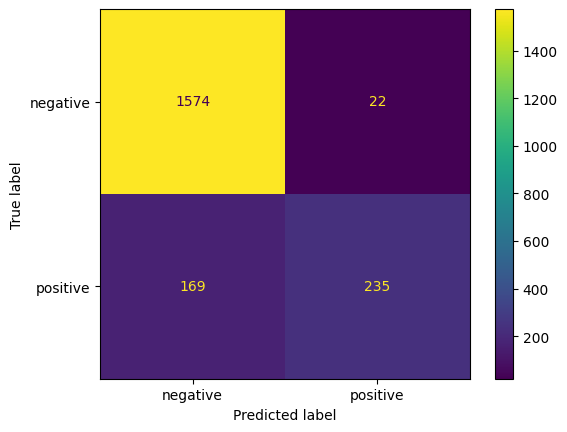

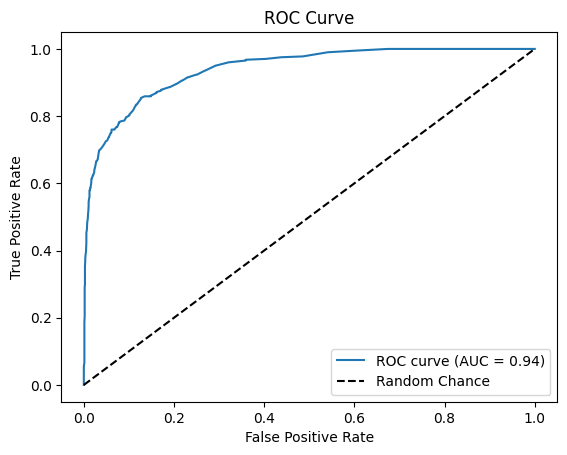

In [14]:
# Calculate accuracy on test set
accuracy = accuracy_score(y_test, data_test_w_preds['prediction'])
print(f"Accuracy: {accuracy}")

#Compute confusion matrix of human sentiment and algorithm sentiment
ConfusionMatrixDisplay.from_predictions(y_test, data_test_w_preds['prediction'])

# Plot ROC curve and calculate AUC on test set
fpr, tpr, _ = roc_curve(y_test.map({'positive': 1, 'negative': 0}), predictions_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()